# Practice 3.
## Objectives:
1. Learn to deal with dates
2. Deal with *colinearity*
3. Do a simple Linear regression

Aplication:
Data basse: Data set from the UCI Machine Learning Repository (http://archive.ics.uci.edu/ml)

Appliances energy prediction Data Set: http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#
Predict **Appliances energy consumption in Watts/hour**.
Database: Wine quality, http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Predict quality (score between 0 and 10)

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [2]:
File = "energydata_complete.csv"
Filename = os.path.join(os.getcwd(),'Data',File)
print(f'Filename with path: \n {Filename}')

Filename with path: 
 C:\Users\raulc\Desktop\Master\Q2\ML\ThirdPractice\Data\energydata_complete.csv


In [3]:
Data = pd.read_csv(Filename)
Data.head().T

0                    1                    2  \
date         2016-01-11 17:00:00  2016-01-11 17:10:00  2016-01-11 17:20:00   
Appliances                    60                   60                   50   
lights                        30                   30                   30   
T1                         19.89                19.89                19.89   
RH_1                   47.596667            46.693333                 46.3   
T2                          19.2                 19.2                 19.2   
RH_2                       44.79              44.7225            44.626667   
T3                         19.79                19.79                19.79   
RH_3                       44.73                44.79            44.933333   
T4                          19.0                 19.0            18.926667   
RH_4                   45.566667              45.9925                45.89   
T5                     17.166667            17.166667            17.166667   
RH_5                        55.2                 55.2                55.09   
T6                      7.026667             6.833333                 6.56   
RH_6                   84.256667            84.063333            83.156667   
T7                          17.2                 17.2                 17.2   
RH_7                   41.626667                41.56            41.433333   
T8                          18.2                 18.2                 18.2   
RH_8                        48.9            48.863333                48.73   
T9                     17.033333            17.066667                 17.0   
RH_9                       45.53                45.56                 45.5   
T_out                        6.6             6.483333             6.366667   
Press_mm_hg                733.5                733.6                733.7   
RH_out                      92.0                 92.0                 92.0   
Windspeed                    7.0             6.666667             6.333333   
Visibility                  63.0            59.166667            55.333333   
Tdewpoint                    5.3                  5.2                  5.1   
rv1                    13.275433            18.606195            28.642668   
rv2                    13.275433            18.606195            28.642668   

                               3                    4  
date         2016-01-11 17:30:00  2016-01-11 17:40:00  
Appliances                    50                   60  
lights                        40                   40  
T1                         19.89                19.89  
RH_1                   46.066667            46.333333  
T2                          19.2                 19.2  
RH_2                       44.59                44.53  
T3                         19.79                19.79  
RH_3                        45.0                 45.0  
T4                         18.89                18.89  
RH_4                   45.723333                45.53  
T5                     17.166667                 17.2  
RH_5                       55.09                55.09  
T6                      6.433333             6.366667  
RH_6                   83.423333            84.893333  
T7                     17.133333                 17.2  
RH_7                       41.29                41.23  
T8                          18.1                 18.1  
RH_8                       48.59                48.59  
T9                          17.0                 17.0  
RH_9                        45.4                 45.4  
T_out                       6.25             6.133333  
Press_mm_hg                733.8                733.9  
RH_out                      92.0                 92.0  
Windspeed                    6.0             5.666667  
Visibility                  51.5            47.666667  
Tdewpoint                    5.0                  4.9  
rv1                    45.410389            10.084097  
rv2                    45.410389            10.084097

## First we clean the date feature into something useful

In [4]:
pd.to_datetime(Data['date'])

0       2016-01-11 17:00:00
1       2016-01-11 17:10:00
2       2016-01-11 17:20:00
3       2016-01-11 17:30:00
4       2016-01-11 17:40:00
                ...        
19730   2016-05-27 17:20:00
19731   2016-05-27 17:30:00
19732   2016-05-27 17:40:00
19733   2016-05-27 17:50:00
19734   2016-05-27 18:00:00
Name: date, Length: 19735, dtype: datetime64[ns]

## Some usefull tools for dealing with dates.
###  We will use lambda functions. Take a look at https://en.wikipedia.org/wiki/Anonymous_function

In [5]:
date_raw = pd.to_datetime(Data['date'])
date_raw.map(lambda x: x.day)

0        11
1        11
2        11
3        11
4        11
         ..
19730    27
19731    27
19732    27
19733    27
19734    27
Name: date, Length: 19735, dtype: int64

In [6]:
day_month = date_raw.map(lambda x: x.day)
day_week = date_raw.map(lambda x: x.dayofweek)
hour_day = date_raw.map(lambda x: x.hour)
Data['day_month'] = day_month
Data['day_week'] = day_week
Data['hour_day'] = hour_day

## Trick for solving that 24h is equal to 0h
Distances in time should be consistent.  23:50 is at 10 minutes from midnight, also 0:10

In [7]:
#Data['hour_day_cos'] = np.cos(2*np.pi*hour_day/24.)
#Data['hour_day_sin'] = np.sin(2*np.pi*hour_day/24.)
Data['Time from Midning'] = np.sqrt(np.power(np.sin(2*np.pi*hour_day/24.),2)+np.power(1.-np.cos(2*np.pi*hour_day/24.),2))

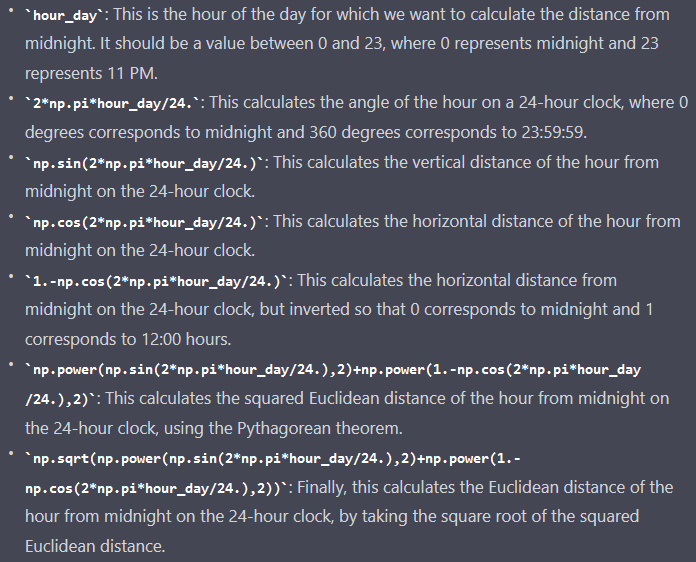

In [8]:
from IPython.display import Image
Image(filename='explicació.png', width=600, height=300)

In [9]:
Data.drop(columns = ['date','rv1','rv2'])

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.566667  46.560000  25.890000  42.025714   
19731          90       0  25.500000  46.500000  25.754000  42.080000   
19732         270      10  25.500000  46.596667  25.628571  42.768571   
19733         420      10  25.500000  46.990000  25.414000  43.036000   
19734         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...      T_out  \
0      19.790000  44.730000  19.000000  45.566667  ...   6.600000   
1      19.790000  44.790000  19.000000  45.992500  ...   6.483333   
2      19.790000  44.933333  18.926667  45.890000  ...   6.366667   
3      19.790000  45.000000  18.890000  45.723333  ...   6.250000   
4      19.790000  45.000000  18.890000  45.530000  ...   6.133333   
...          ...        ...        ...        ...  ...        ...   
19730  27.200000  41.163333  24.700000  45.590000  ...  22.733333   
19731  27.133333  41.223333  24.700000  45.590000  ...  22.600000   
19732  27.050000  41.690000  24.700000  45.730000  ...  22.466667   
19733  26.890000  41.290000  24.700000  45.790000  ...  22.333333   
19734  26.823333  41.156667  24.700000  45.963333  ...  22.200000   

       Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  day_month  \
0            733.5  92.000000   7.000000   63.000000   5.300000         11   
1            733.6  92.000000   6.666667   59.166667   5.200000         11   
2            733.7  92.000000   6.333333   55.333333   5.100000         11   
3            733.8  92.000000   6.000000   51.500000   5.000000         11   
4            733.9  92.000000   5.666667   47.666667   4.900000         11   
...            ...        ...        ...         ...        ...        ...   
19730        755.2  55.666667   3.333333   23.666667  13.333333         27   
19731        755.2  56.000000   3.500000   24.500000  13.300000         27   
19732        755.2  56.333333   3.666667   25.333333  13.266667         27   
19733        755.2  56.666667   3.833333   26.166667  13.233333         27   
19734        755.2  57.000000   4.000000   27.000000  13.200000         27   

       day_week  hour_day  Time from Midning  
0             0        17           1.586707  
1             0        17           1.586707  
2             0        17           1.586707  
3             0        17           1.586707  
4             0        17           1.586707  
...         ...       ...                ...  
19730         4        17           1.586707  
19731         4        17           1.586707  
19732         4        17           1.586707  
19733         4        17           1.586707  
19734         4        18           1.414214  

[19735 rows x 30 columns]

###  Surprise:  still is in the Dataframe
###  Trick: option 'inplace = True'  (more efficient in memory)

In [10]:
Data.head().T

0                    1  \
date               2016-01-11 17:00:00  2016-01-11 17:10:00   
Appliances                          60                   60   
lights                              30                   30   
T1                               19.89                19.89   
RH_1                         47.596667            46.693333   
T2                                19.2                 19.2   
RH_2                             44.79              44.7225   
T3                               19.79                19.79   
RH_3                             44.73                44.79   
T4                                19.0                 19.0   
RH_4                         45.566667              45.9925   
T5                           17.166667            17.166667   
RH_5                              55.2                 55.2   
T6                            7.026667             6.833333   
RH_6                         84.256667            84.063333   
T7                                17.2                 17.2   
RH_7                         41.626667                41.56   
T8                                18.2                 18.2   
RH_8                              48.9            48.863333   
T9                           17.033333            17.066667   
RH_9                             45.53                45.56   
T_out                              6.6             6.483333   
Press_mm_hg                      733.5                733.6   
RH_out                            92.0                 92.0   
Windspeed                          7.0             6.666667   
Visibility                        63.0            59.166667   
Tdewpoint                          5.3                  5.2   
rv1                          13.275433            18.606195   
rv2                          13.275433            18.606195   
day_month                           11                   11   
day_week                             0                    0   
hour_day                            17                   17   
Time from Midning             1.586707             1.586707   

                                     2                    3  \
date               2016-01-11 17:20:00  2016-01-11 17:30:00   
Appliances                          50                   50   
lights                              30                   40   
T1                               19.89                19.89   
RH_1                              46.3            46.066667   
T2                                19.2                 19.2   
RH_2                         44.626667                44.59   
T3                               19.79                19.79   
RH_3                         44.933333                 45.0   
T4                           18.926667                18.89   
RH_4                             45.89            45.723333   
T5                           17.166667            17.166667   
RH_5                             55.09                55.09   
T6                                6.56             6.433333   
RH_6                         83.156667            83.423333   
T7                                17.2            17.133333   
RH_7                         41.433333                41.29   
T8                                18.2                 18.1   
RH_8                             48.73                48.59   
T9                                17.0                 17.0   
RH_9                              45.5                 45.4   
T_out                         6.366667                 6.25   
Press_mm_hg                      733.7                733.8   
RH_out                            92.0                 92.0   
Windspeed                     6.333333                  6.0   
Visibility                   55.333333                 51.5   
Tdewpoint                          5.1                  5.0   
rv1                          28.642668            45.410389   
rv2                          28.642668            45.410389   
day_

## Lets look at the histogram of Appliances

1. **Note that there are outliers**  
2. **Linear regression does not work well with outliers of high value**
3. **The distribution is not Gaussian**

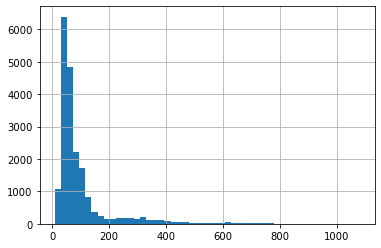

In [11]:
ax = Data['Appliances'].hist(bins = 50)

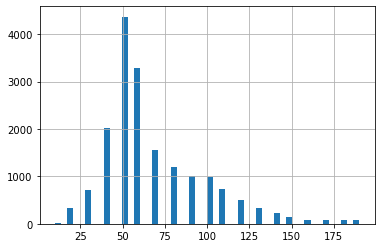

In [12]:
Threshold = 200
Data = Data[Data['Appliances']<Threshold]
ax = Data['Appliances'].hist(bins = 50)

In [13]:
Data.drop(columns = ['date','rv1','rv2'],inplace = True)

## Feature engineering by using (known) interactions

In [14]:
Data['Press_mm_hg'] = Data['Press_mm_hg']/10.
Data['lightsXPress_mm_hg'] = Data['lights']*Data['Press_mm_hg']/100.
Data['Press_mm_hgXRH_out'] = Data['Press_mm_hg']*Data['RH_out']/100.
Data['Diff TempOutIn'] = np.mean(Data[['T1','T2','T3','T4','T5','T7','T9']].T)-(Data['T6']+Data['T_out'])/2
#Data['diff RH_OutIn'] = np.mean(Data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_7','RH_9']].T) - Data['RH_out']
Data.head().T

C:\Users\raulc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0          1          2          3          4
Appliances          60.000000  60.000000  50.000000  50.000000  60.000000
lights              30.000000  30.000000  30.000000  40.000000  40.000000
T1                  19.890000  19.890000  19.890000  19.890000  19.890000
RH_1                47.596667  46.693333  46.300000  46.066667  46.333333
T2                  19.200000  19.200000  19.200000  19.200000  19.200000
RH_2                44.790000  44.722500  44.626667  44.590000  44.530000
T3                  19.790000  19.790000  19.790000  19.790000  19.790000
RH_3                44.730000  44.790000  44.933333  45.000000  45.000000
T4                  19.000000  19.000000  18.926667  18.890000  18.890000
RH_4                45.566667  45.992500  45.890000  45.723333  45.530000
T5                  17.166667  17.166667  17.166667  17.166667  17.200000
RH_5                55.200000  55.200000  55.090000  55.090000  55.090000
T6                   7.026667   6.833333   6.560000   6.433333   6.366667
RH_6                84.256667  84.063333  83.156667  83.423333  84.893333
T7                  17.200000  17.200000  17.200000  17.133333  17.200000
RH_7                41.626667  41.560000  41.433333  41.290000  41.230000
T8                  18.200000  18.200000  18.200000  18.100000  18.100000
RH_8                48.900000  48.863333  48.730000  48.590000  48.590000
T9                  17.033333  17.066667  17.000000  17.000000  17.000000
RH_9                45.530000  45.560000  45.500000  45.400000  45.400000
T_out                6.600000   6.483333   6.366667   6.250000   6.133333
Press_mm_hg         73.350000  73.360000  73.370000  73.380000  73.390000
RH_out              92.000000  92.000000  92.000000  92.000000  92.000000
Windspeed            7.000000   6.666667   6.333333   6.000000   5.666667
Visibility          63.000000  59.166667  55.333333  51.500000  47.666667
Tdewpoint            5.300000   5.200000   5.100000   5.000000   4.900000
day_month           11.000000  11.000000  11.000000  11.000000  11.000000
day_week             0.000000   0.000000   0.000000   0.000000   0.000000
hour_day            17.000000  17.000000  17.000000  17.000000  17.000000
Time from Midning    1.586707   1.586707   1.586707   1.586707   1.586707
lightsXPress_mm_hg  22.005000  22.008000  22.011000  29.352000  29.356000
Press_mm_hgXRH_out  67.482000  67.491200  67.500400  67.509600  67.518800
Diff TempOutIn      11.655238  11.815000  11.990000  12.096905  12.202857

## Exploratory analysis of the data

In [15]:
if False:
    ax = pd.plotting.scatter_matrix(Data,figsize = (10,10))

## Lets see subsets of the features
**Task to be done**: 
* Detect colinearities
* See if the gaussian hypothesis is valid from the histograms
###  Extract subsets with a list comprehension

In [16]:
List_temprature = [ v for v in Data.columns.values if 'T' in v]
print(List_temprature)

['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Tdewpoint', 'Time from Midning', 'Diff TempOutIn']


### We append the target feature

In [17]:
List_temprature.append('Appliances')
print(List_temprature)

['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T_out', 'Tdewpoint', 'Time from Midning', 'Diff TempOutIn', 'Appliances']


In [18]:
df_temperatures = Data[List_temprature]

In [19]:
if False:
    ax = pd.plotting.scatter_matrix(df_temperatures,figsize = (10,10))

### Excercise: <font color='red'> Select subsets of features that of a common type (i.e. are correlated) </font>

In order to do this we'll use the correlation matrix. We'll only use the lower triangle values of the correlation matrix to avoid redundancy

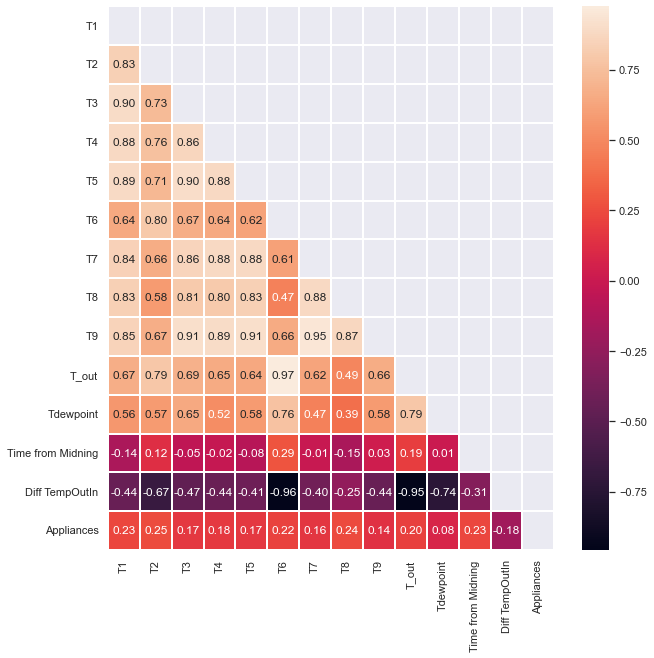

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
corr_matrix = df_temperatures.corr()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', linewidth=2)
del sns

In [21]:
# Define a custom sorting key that takes the absolute value of the values
sorting_key = lambda x: abs(x)

# Get the top correlated features for each column
for i, column in enumerate(corr_matrix.columns):
    # Sort the correlation values for the current column in descending order
    sorted_corrs = corr_matrix.iloc[:, i].sort_values(key=sorting_key, ascending=False)

    # Print the top 5 correlated features (excluding itself)
    print(f"\nTop correlations for '{column}':")
    for j in range(1, 6):
        print(f"{j}. {sorted_corrs.index[j]}: {sorted_corrs[j]:.2f}")


Top correlations for 'T1':
1. T3: 0.90
2. T5: 0.89
3. T4: 0.88
4. T9: 0.85
5. T7: 0.84

Top correlations for 'T2':
1. T1: 0.83
2. T6: 0.80
3. T_out: 0.79
4. T4: 0.76
5. T3: 0.73

Top correlations for 'T3':
1. T9: 0.91
2. T5: 0.90
3. T1: 0.90
4. T4: 0.86
5. T7: 0.86

Top correlations for 'T4':
1. T9: 0.89
2. T7: 0.88
3. T1: 0.88
4. T5: 0.88
5. T3: 0.86

Top correlations for 'T5':
1. T9: 0.91
2. T3: 0.90
3. T1: 0.89
4. T7: 0.88
5. T4: 0.88

Top correlations for 'T6':
1. T_out: 0.97
2. Diff TempOutIn: -0.96
3. T2: 0.80
4. Tdewpoint: 0.76
5. T3: 0.67

Top correlations for 'T7':
1. T9: 0.95
2. T8: 0.88
3. T4: 0.88
4. T5: 0.88
5. T3: 0.86

Top correlations for 'T8':
1. T7: 0.88
2. T9: 0.87
3. T1: 0.83
4. T5: 0.83
5. T3: 0.81

Top correlations for 'T9':
1. T7: 0.95
2. T5: 0.91
3. T3: 0.91
4. T4: 0.89
5. T8: 0.87

Top correlations for 'T_out':
1. T6: 0.97
2. Diff TempOutIn: -0.95
3. Tdewpoint: 0.79
4. T2: 0.79
5. T3: 0.69

Top correlations for 'Tdewpoint':
1. T_out: 0.79
2. T6: 0.76
3. Diff T

In this list we identify (with redundant information) the most important correlations between variables in the correlation matrix. By checking the sign of the correlations we can easily distinguish subsets of features which are correlated in any way in particular.

In general, the temperatures inside the hous are very correlated. Also, the humidities.
This seems reasonable because the spaces are very close to each other and share the same environment.

## First Estimate of the Output  with all the features

### Divide database into Train and test databases.

This is important in order to know how the model will behave with **unseen data**.

Note: there are more efficient and elegant methods for doing the partition, but we want to learn how to do basic processes with dataframes.

In [22]:
NumSamples, NumFeatures = Data.shape

### We generate the pointers for selecting the training and testing elements

In [23]:
Index = list(range(NumSamples))
print(Index[:10])
RandomIndex = np.random.permutation(Index)
print(RandomIndex[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[14089  7723   878  8951 17617 17604  3668   575 17291  7275]


In [24]:
Fraction = 0.75
NumTrainElements = int(Fraction*NumSamples)
NumTestElements = NumSamples - NumTrainElements  # We will not need this variable
print(f'Number of training elements: {NumTrainElements}. Number of test elements:{NumTestElements}')

Number of training elements: 13320. Number of test elements:4441


### Take notice of how the elements are selected:

* Notation:  **Variable[:Number]**
* Notation: **Dataframe.loc[list]**

In [25]:
TrainIndex = RandomIndex[:NumTrainElements]
TestIndex = RandomIndex[NumTrainElements:]
TrainIndex

array([14089,  7723,   878, ..., 10663, 15620, 17641])

In [26]:
TrainDB = Data.iloc[TrainIndex]
TestDB = Data.iloc[TestIndex]

## Train the model and compute the explained variance $R^2$ and RMSE.

The $R^2$ is computed as follows:

1. $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$
2.  RMSE:  The root square of: $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$
**Note:** Try to learn how to write **latex** formulas.  It will very usefull.

In [27]:
y = TrainDB['Appliances']
InputFeatures = [fea for fea in Data.columns if 'Appliances' not in fea]
print(f' Input variables: \n {InputFeatures}')
print('_'*50)
X = TrainDB[InputFeatures]
reg = LinearRegression().fit(X, y)

 Input variables: 
 ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'day_month', 'day_week', 'hour_day', 'Time from Midning', 'lightsXPress_mm_hg', 'Press_mm_hgXRH_out', 'Diff TempOutIn']
__________________________________________________


### Performance in the train database

In [28]:
print(f'explained variance R^2: {reg.score(X, y)*100.:2.2f} %')
Y_hat = reg.predict(X)
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
print('='*60)
print(f'Rank of the matrix: {reg.rank_} >  Number of features:{X.shape[1]}' )
print('Note: Rank is a concept of linear algebra related to the inverse of the matrix. \n You should be familliar with it.')
print('_'*60)

explained variance R^2: 38.62 %
RMSE : 23.81 
Rank of the matrix: 31 >  Number of features:32
Note: Rank is a concept of linear algebra related to the inverse of the matrix. 
 You should be familliar with it.
____________________________________________________________


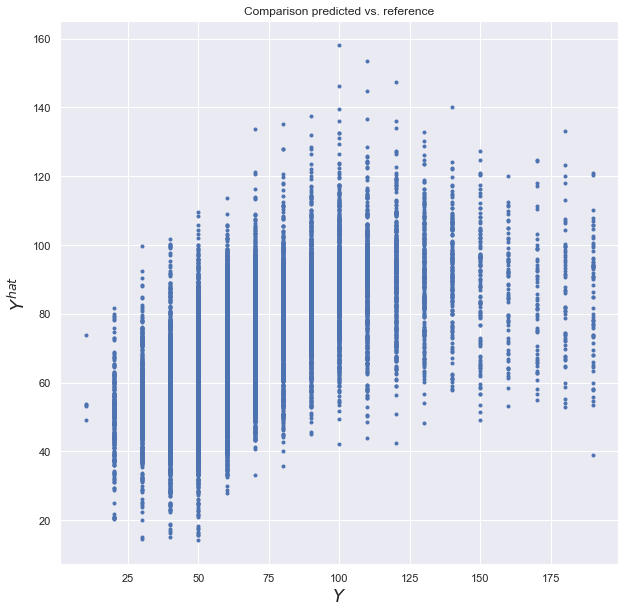

In [29]:
Y_hat = reg.predict(X)
plt.plot(y,Y_hat,'.')
plt.title('Comparison predicted vs. reference')
plt.ylabel('$Y^{hat}$', fontsize=18)
plt.xlabel('$Y$', fontsize=18)
plt.show()

<AxesSubplot:>

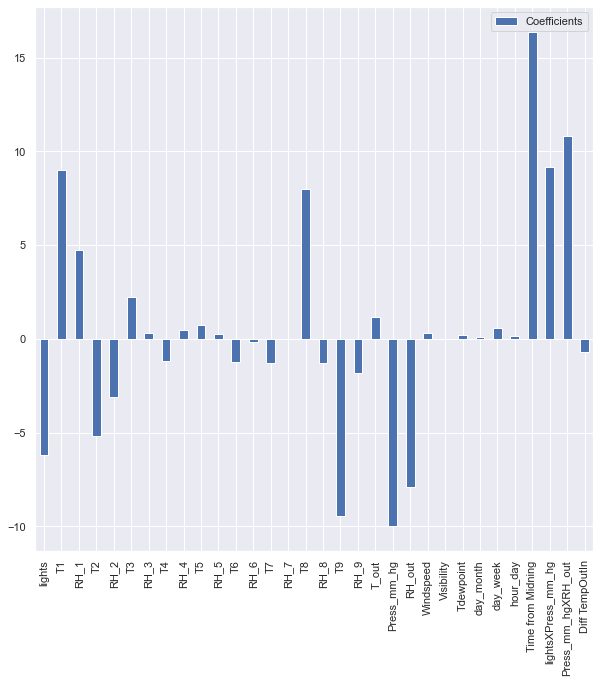

In [30]:
df = pd.DataFrame(data = reg.coef_, index = InputFeatures, columns = ['Coefficients'] )
df.plot.bar()

### Lets see how well it does with the test database.

We will give as performance features:
1. Explainee variance: $R^2$
2. RMSE:  The root square of: $\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$

### Dataframe for comparing Performance

In [31]:
Performance = pd.DataFrame(index = ['R^2','RMSE'],columns = ['Regression','Ridge'])

explained variance $R^2$: 38.61 %
RMSE : 24.21 


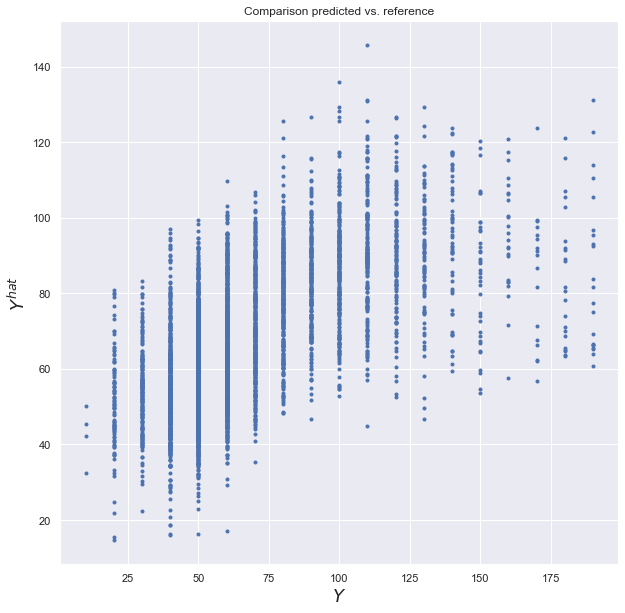

In [32]:
y = TestDB['Appliances']
X = TestDB[InputFeatures]
Y_hat = reg.predict(X)
print(f'explained variance $R^2$: {sklearn.metrics.r2_score(y, Y_hat)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
Performance.loc['R^2','Regression'] = reg.score(X, y)*100. 
Performance.loc['RMSE','Regression'] = np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat))

plt.plot(y,Y_hat,'.')
plt.title('Comparison predicted vs. reference')
plt.ylabel('$Y^{hat}$', fontsize=18)
plt.xlabel('$Y$', fontsize=18)
plt.show()

## Use a method that solves the problem of colinearity
### $W = (X^T X+ \lambda I)^{-1}X^Ty$
###  Name: Ridge regression

Ridge regression solves the problem of collinearity by adding a penalty term to the least squares objective function that is minimized during the regression process. This penalty term is proportional to the square of the magnitude of the regression coefficients, which has the effect of shrinking the coefficients towards zero. The degree of shrinkage is controlled by a tuning parameter, often denoted as $\lambda$, which is chosen based on cross-validation or other model selection methods.

The addition of the penalty term has the effect of reducing the variance of the estimates of the regression coefficients, making them more stable and less sensitive to small changes in the data. It also has the effect of reducing the bias of the estimates in the presence of collinearity, by reducing the size of the coefficients for variables that are highly correlated with others. This can improve the overall performance of the model by reducing overfitting and improving its generalization to new data.

For $\lambda = 0$ we recover the original equation of OLS regression.


explained variance $R^2$: 38.43 %
RMSE : 23.85 
__________________________________________________


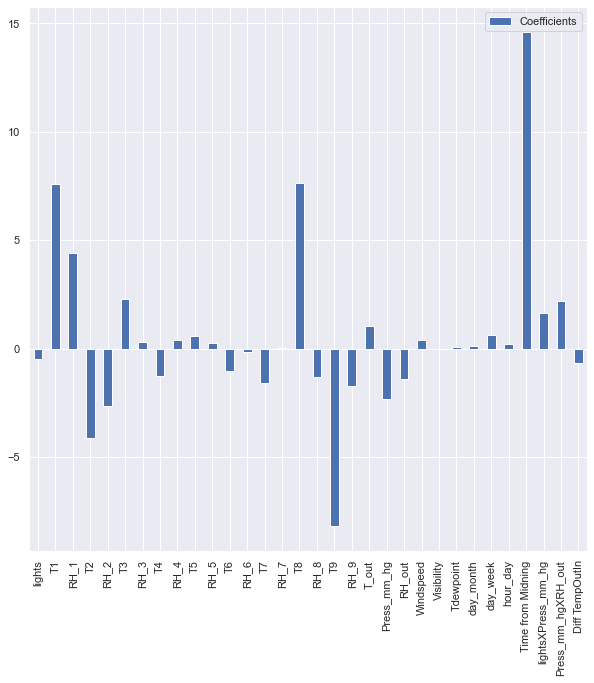

In [33]:
Lambda = 200.0
y = TrainDB['Appliances']
X = TrainDB[InputFeatures]
ridge = Ridge(alpha = Lambda).fit(X, y)
Y_hat = ridge.predict(X)
print(f'explained variance $R^2$: {ridge.score(X, y)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
print('_'*50)
df = pd.DataFrame(data = ridge.coef_, index = InputFeatures, columns = ['Coefficients'] )
ax = df.plot.bar()

### Ridge regression on the Test database

explained variance $R^2$: 38.49 %
RMSE : 24.23 


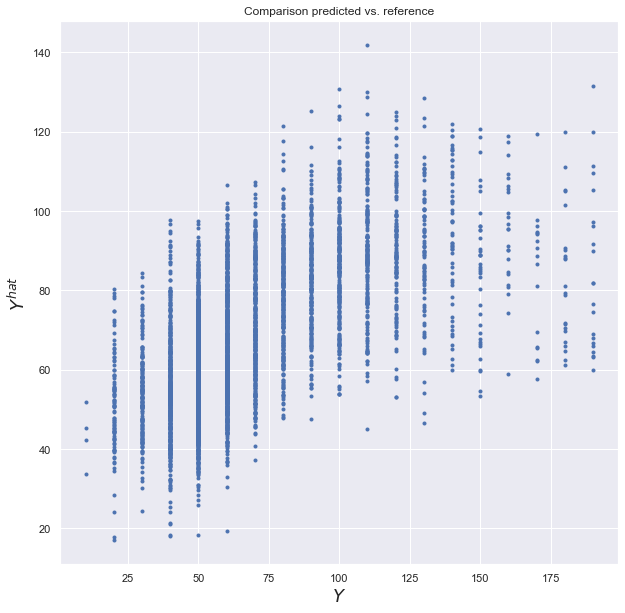

In [34]:
y = TestDB['Appliances']
X = TestDB[InputFeatures]
Y_hat = ridge.predict(X)
print(f'explained variance $R^2$: {sklearn.metrics.r2_score(y, Y_hat)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
Performance.loc['R^2','Ridge'] = ridge.score(X, y)*100. 
Performance.loc['RMSE','Ridge'] = np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat))

plt.plot(y,Y_hat,'.')
plt.title('Comparison predicted vs. reference')
plt.ylabel('$Y^{hat}$', fontsize=18)
plt.xlabel('$Y$', fontsize=18)
plt.show()

In [35]:
print('Comparison of performance on the test database')
Performance

Comparison of performance on the test database


Regression      Ridge
R^2   38.611657  38.492665
RMSE  24.206983  24.230433

In [36]:
print('Comparison of the mean absolute value of the coefficients:')
print(f' Regression:{np.mean(abs(reg.coef_)):2.2f} > Ridge:{np.mean(abs(ridge.coef_)):2.2f}')

Comparison of the mean absolute value of the coefficients:
 Regression:3.57 > Ridge:2.22


## Exercise: <font color='red'> explain from the theory why the sum of the absolute values of the Ridge regression is lower than the regression.</font>  

In Ridge regression, the regularization penalty term that is added to the ordinary least squares (OLS) objective function is a function of the sum of the squares of the regression coefficients. This penalty term has the effect of shrinking the coefficient estimates towards zero and reducing their magnitudes, which in turn reduces the complexity of the model and helps to prevent overfitting.

Since the Ridge regression penalty term is based on the sum of squares, it is not directly related to the absolute values of the coefficients. However, Ridge regression does tend to shrink the coefficients towards zero, which can result in lower absolute values for the coefficients compared to those in OLS regression.

As $\lambda$ increases, the degree of regularization increases, which leads to further shrinking of the coefficient estimates towards zero and further reduction in their magnitudes.

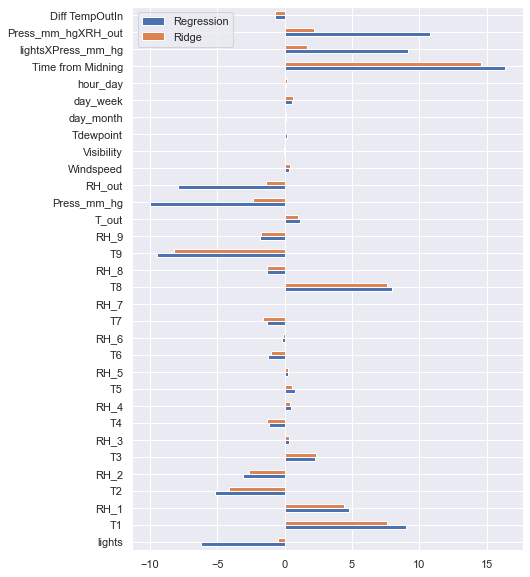

In [37]:
df = pd.DataFrame(index = InputFeatures,columns =['Regression','Ridge'])
df['Regression'] = reg.coef_
df['Ridge'] = ridge.coef_
ax = df.plot.barh(figsize = (7,10))

## Exercise: <font color='red'> play with ploting 'bar()' vs 'barh()' vs '.plot.bar(stacked=True)' vs '.plot.barh(stacked=True)' </font>  

Stacked option stacks the value of both variables in the same place, on on top of another, which eases the comparison in some cases. However I think it is not that helpful now.

<AxesSubplot:>

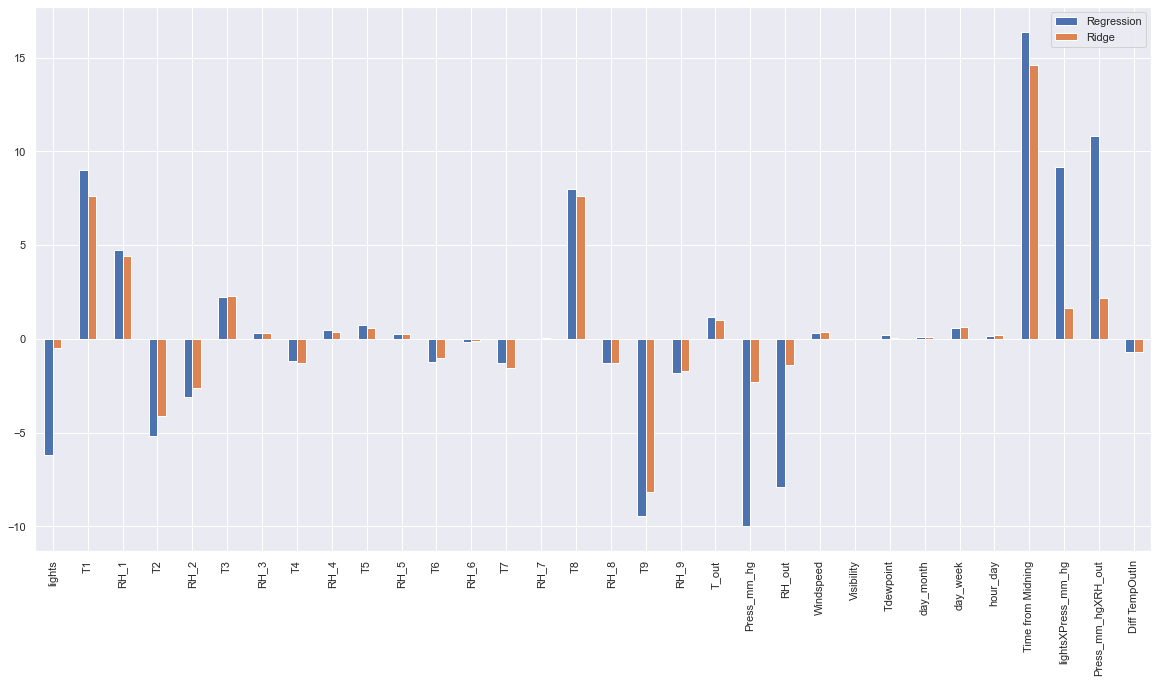

In [38]:
# create a vertical bar chart with bar()
df.plot.bar(figsize = (20,10))

## Exercise: <font color='red'> Change the threshold of the **outlier** filter  and explain in words what happens (R^2, values of the coefficients)</font>  

- Let's explore the effects of changing the threshold of the outlier filter.

In [39]:
# Loading and preprocessing
Data = pd.read_csv(Filename)
Data.head().T
pd.to_datetime(Data['date'])
date_raw = pd.to_datetime(Data['date'])
date_raw.map(lambda x: x.day)
day_month = date_raw.map(lambda x: x.day)
day_week = date_raw.map(lambda x: x.dayofweek)
hour_day = date_raw.map(lambda x: x.hour)
Data['day_month'] = day_month
Data['day_week'] = day_week
Data['hour_day'] = hour_day
Data['Time from Midning'] = np.sqrt(np.power(np.sin(2*np.pi*hour_day/24.),2)+np.power(1.-np.cos(2*np.pi*hour_day/24.),2))
Data.drop(columns = ['date','rv1','rv2'],inplace = True)

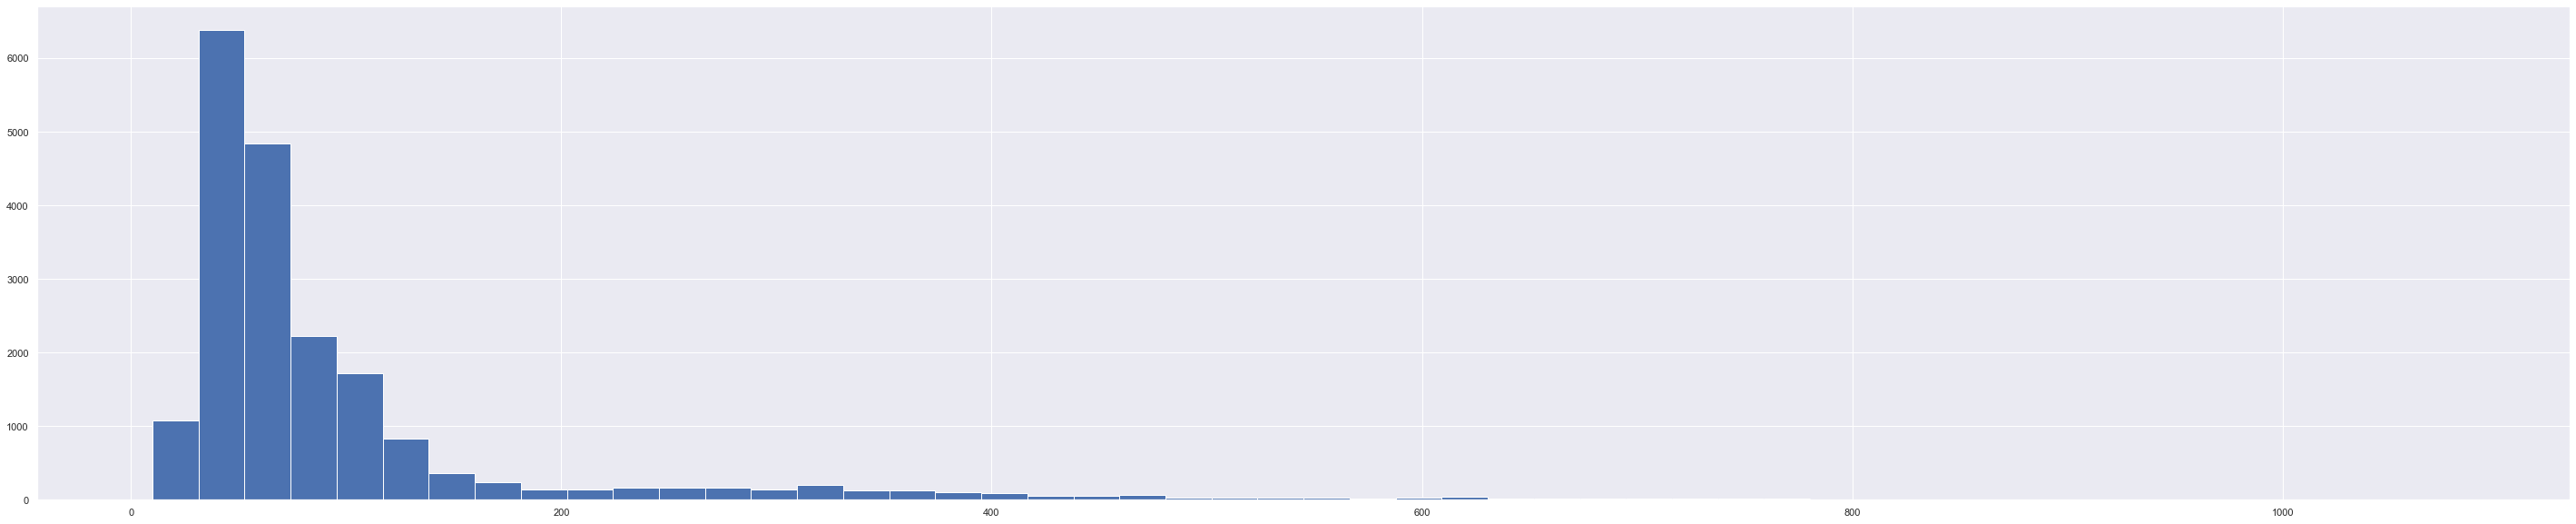

interactive(children=(FloatSlider(value=200.0, description='Threshold:', max=500.0, min=100.0, step=10.0), Out…

In [40]:
# Apply desired outlier threshold.

plt.figure(figsize=(50,10))
Data['Appliances'].hist(bins=50)
Threshold = 200

from ipywidgets import interact, FloatSlider
# create a function to plot the histogram
def plot_histogram(Threshold, Data):
    global filtered_data
    filtered_data = Data[Data['Appliances']<Threshold] # filter out data points above threshold
    plt.figure(figsize=(50,10))

    filtered_data['Appliances'].hist(bins = 50)

# create a slider widget
slider = FloatSlider(value=Threshold, min=100, max=500, step=10, description='Threshold:')

# update the histogram using the slider value
def update_histogram(Threshold):
    plot_histogram(Threshold, Data)
    
interact(update_histogram, Threshold=slider);

In [41]:
Data = filtered_data
Data.head().T

0           1           2           3           4
Appliances          60.000000   60.000000   50.000000   50.000000   60.000000
lights              30.000000   30.000000   30.000000   40.000000   40.000000
T1                  19.890000   19.890000   19.890000   19.890000   19.890000
RH_1                47.596667   46.693333   46.300000   46.066667   46.333333
T2                  19.200000   19.200000   19.200000   19.200000   19.200000
RH_2                44.790000   44.722500   44.626667   44.590000   44.530000
T3                  19.790000   19.790000   19.790000   19.790000   19.790000
RH_3                44.730000   44.790000   44.933333   45.000000   45.000000
T4                  19.000000   19.000000   18.926667   18.890000   18.890000
RH_4                45.566667   45.992500   45.890000   45.723333   45.530000
T5                  17.166667   17.166667   17.166667   17.166667   17.200000
RH_5                55.200000   55.200000   55.090000   55.090000   55.090000
T6                   7.026667    6.833333    6.560000    6.433333    6.366667
RH_6                84.256667   84.063333   83.156667   83.423333   84.893333
T7                  17.200000   17.200000   17.200000   17.133333   17.200000
RH_7                41.626667   41.560000   41.433333   41.290000   41.230000
T8                  18.200000   18.200000   18.200000   18.100000   18.100000
RH_8                48.900000   48.863333   48.730000   48.590000   48.590000
T9                  17.033333   17.066667   17.000000   17.000000   17.000000
RH_9                45.530000   45.560000   45.500000   45.400000   45.400000
T_out                6.600000    6.483333    6.366667    6.250000    6.133333
Press_mm_hg        733.500000  733.600000  733.700000  733.800000  733.900000
RH_out              92.000000   92.000000   92.000000   92.000000   92.000000
Windspeed            7.000000    6.666667    6.333333    6.000000    5.666667
Visibility          63.000000   59.166667   55.333333   51.500000   47.666667
Tdewpoint            5.300000    5.200000    5.100000    5.000000    4.900000
day_month           11.000000   11.000000   11.000000   11.000000   11.000000
day_week             0.000000    0.000000    0.000000    0.000000    0.000000
hour_day            17.000000   17.000000   17.000000   17.000000   17.000000
Time from Midning    1.586707    1.586707    1.586707    1.586707    1.586707

In [42]:
# Features engineering
Data['Press_mm_hg'] = Data['Press_mm_hg']/10
Data['lightsXPress_mm_hg'] = Data['lights']*Data['Press_mm_hg']/100
Data['Press_mm_hgXRH_out'] = Data['Press_mm_hg']*Data['RH_out']/100
Data['Diff TempOutIn'] = np.mean(Data[['T1','T2','T3','T4','T5','T7','T9']].T)-(Data['T6']+Data['T_out'])/2


# Partitoning
NumSamples, NumFeatures = Data.shape
Index = list(range(NumSamples))
RandomIndex = np.random.permutation(Index)
Fraction = 0.75
NumTrainElements = int(Fraction*NumSamples)
NumTestElements = NumSamples - NumTrainElements  # We will not need this variable
TrainIndex = RandomIndex[:NumTrainElements]
TestIndex = RandomIndex[NumTrainElements:]
TrainDB = Data.iloc[TrainIndex]
TestDB = Data.iloc[TestIndex]

C:\Users\raulc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [43]:
# Train dataset
y = TrainDB['Appliances']
InputFeatures = [fea for fea in Data.columns if 'Appliances' not in fea]
X = TrainDB[InputFeatures]
reg = LinearRegression().fit(X, y)
Y_hat = reg.predict(X)

print(f'explained variance R^2: {reg.score(X, y)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
print('='*60)
print(f'Rank of the matrix: {reg.rank_} >  Number of features:{X.shape[1]}' )
print('_'*60)

explained variance R^2: 38.21 %
RMSE : 23.99 
Rank of the matrix: 31 >  Number of features:32
____________________________________________________________


The rank of the matrix is much lower than befor. The matrix is becomming much more singular in terms of independent columns or rows. Thus, we expect a decrease in overall performance.

In [44]:
# Same for RIDGE
Lambda = 200

ridge = Ridge(alpha = Lambda).fit(X, y)
Y_hat = ridge.predict(X)
print(f'explained variance $R^2$: {ridge.score(X, y)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
print('_'*50)

explained variance $R^2$: 38.05 %
RMSE : 24.02 
__________________________________________________


In [45]:
# Test dataset regression
Performance = pd.DataFrame(index = ['R^2','RMSE'],columns = ['Regression','Ridge'])

y = TestDB['Appliances']
X = TestDB[InputFeatures]
Y_hat = reg.predict(X)
print(f'explained variance $R^2$: {sklearn.metrics.r2_score(y, Y_hat)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
Performance.loc['R^2','Regression'] = reg.score(X, y)*100. 
Performance.loc['RMSE','Regression'] = np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat))

explained variance $R^2$: 39.81 %
RMSE : 23.67 


In [46]:
Y_hat = ridge.predict(X)
print(f'explained variance $R^2$: {sklearn.metrics.r2_score(y, Y_hat)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
Performance.loc['R^2','Ridge'] = ridge.score(X, y)*100. 
Performance.loc['RMSE','Ridge'] = np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat))

explained variance $R^2$: 39.65 %
RMSE : 23.70 


In [47]:
print('Comparison of performance on the test database')
Performance

Comparison of performance on the test database


Regression      Ridge
R^2     39.8095  39.646576
RMSE  23.665489  23.697497

In [48]:
df = pd.DataFrame(index = InputFeatures,columns =['Regression','Ridge'])
df['Regression'] = reg.coef_
df['Ridge'] = ridge.coef_

In [49]:
print('Comparison of the mean absolute value of the coefficients:')
print(f' Regression:{np.mean(abs(reg.coef_)):2.2f} > Ridge:{np.mean(abs(ridge.coef_)):2.2f}')

Comparison of the mean absolute value of the coefficients:
 Regression:3.38 > Ridge:2.19


<AxesSubplot:>

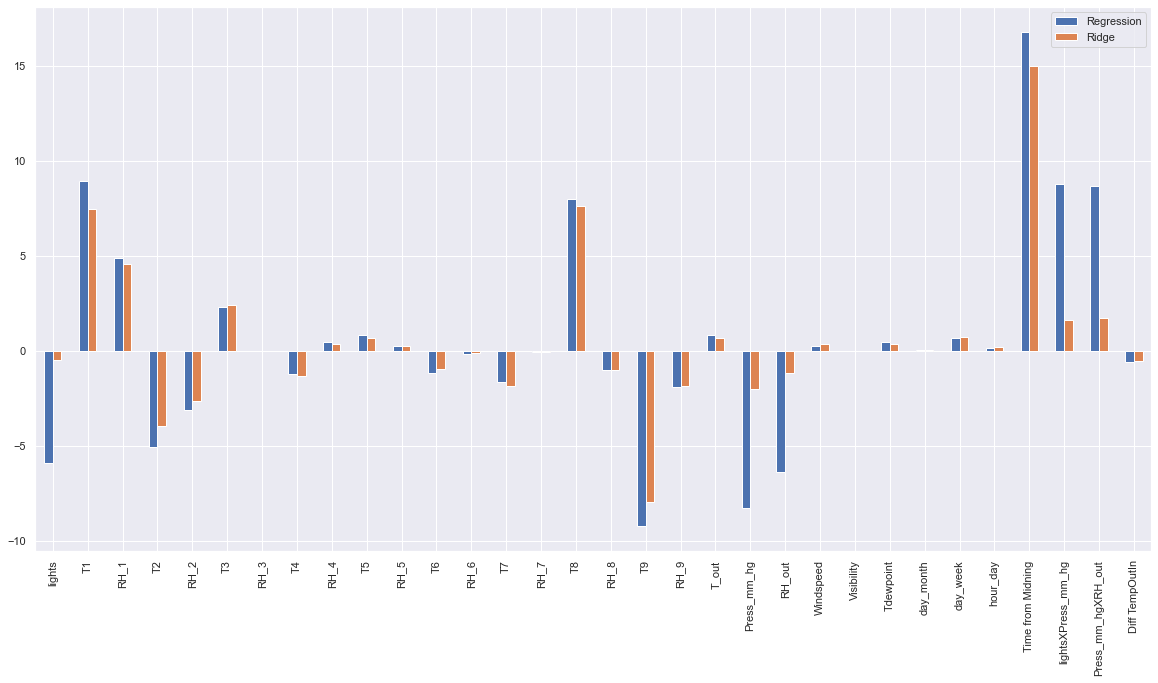

In [50]:
# create a vertical bar chart with bar()
df.plot.bar(figsize = (20,10))

With a lower threshold we observe that RIDGE performs better than ordinary least squares regression. However, the $R^2$ and the $RMSE$ of the best model now is worse than the ones from last case (higher threshold).

With a higher threshold OLS regression performs better than RIDGE and overall quality coefficients are better than in the sample case with threshold 200 (since we have more data?).

You can move the slider and run the code in order to obtain this.


## Exercise: <font color='red'> What does it mean that the coefficients of related variables (i.e. T3 vs. T2, RH_1 vs RH_2) have different signs.</font> Hint: contrast  

When the coefficients of related variables have different signs, it means that the effect of one variable on the response variable is opposite to the effect of the other variable. In the given example, the coefficients of T2 and T3 have different signs, which indicates that as the temperature of T2 increases, the response variable will increase, while as the temperature of T3 increases, the response variable will decrease. Similarly, the coefficients of RH_1 and RH_2 have different signs, indicating that as the humidity of RH_1 increases, the response variable will decrease, while as the humidity of RH_2 increases, the response variable will increase. This contrast between the coefficients of related variables with different signs suggests that these variables have different effects on the response variable and should be included in the model separately.

## Exercise: <font color='red'> Explain why the Ridge is more robust to noise in comparison to regression.</font> Hint: size of contrasting coefficients  

Ridge regression is more robust to noise compared to linear regression because it shrinks the regression coefficients towards zero, reducing the impact of irrelevant features on the model. This is achieved by adding a penalty term to the sum of squared errors, which is proportional to the square of the magnitude of the coefficients.

When there is high correlation among the features or the number of features is much larger than the number of observations, the regression coefficients become unstable, leading to overfitting. In such cases, Ridge regression can help by reducing the magnitude of the coefficients, which in turn reduces the variance of the estimates.

One way to understand why Ridge is more robust to noise is to consider the size of contrasting coefficients. In linear regression, if two related features have very different coefficients (one positive and the other negative), a small perturbation in the data may cause the estimates to change drastically, leading to overfitting. On the other hand, Ridge regression tends to shrink the coefficients towards each other, reducing the size of contrasting coefficients, making the model more stable and robust to noise.

To sum up, Ridge regression is more robust to noise than linear regression because it can handle multicollinearity and reduces the size of contrasting coefficients, making the model less sensitive to small perturbations in the data.

## Exercise: <font color='red'> Create a new model transforming the inputs, substitute the temperatures by mean temperature, the humidity by mean humidity. Compare size of coefficients and effect of the lambda</font> 

In [51]:
# Loading and preprocessing
Data = pd.read_csv(Filename)
Data.head().T
pd.to_datetime(Data['date'])
date_raw = pd.to_datetime(Data['date'])
date_raw.map(lambda x: x.day)
day_month = date_raw.map(lambda x: x.day)
day_week = date_raw.map(lambda x: x.dayofweek)
hour_day = date_raw.map(lambda x: x.hour)
Data['day_month'] = day_month
Data['day_week'] = day_week
Data['hour_day'] = hour_day
Data['Time from Midning'] = np.sqrt(np.power(np.sin(2*np.pi*hour_day/24.),2)+np.power(1.-np.cos(2*np.pi*hour_day/24.),2))
Data.drop(columns = ['date','rv1','rv2'],inplace = True)

In [52]:
Threshold = 200
Data = Data[Data['Appliances']<Threshold]
# Features engineering
Data['Press_mm_hg'] = Data['Press_mm_hg']/10
Data['lightsXPress_mm_hg'] = Data['lights']*Data['Press_mm_hg']/100
Data['Press_mm_hgXRH_out'] = Data['Press_mm_hg']*Data['RH_out']/100
Data['Diff TempOutIn'] = np.mean(Data[['T1','T2','T3','T4','T5','T7','T9']].T)-(Data['T6']+Data['T_out'])/2

C:\Users\raulc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


I'll assume that only outside temperatures and humidity must be replaced.

In [53]:
# Replace temperatures by mean temperature
temp_cols = [f'T{i}' for i in range(1, 10)]
mean_temp = Data[temp_cols].mean(axis=1)
Data['mean_temp'] = mean_temp
Data.drop(temp_cols, axis=1, inplace=True)

# Replace humidity by mean humidity
hum_cols = [f'RH_{i}' for i in range(1, 10)]
mean_humidity = Data[hum_cols].mean(axis=1)
Data['mean_humidity'] = mean_humidity
Data.drop(hum_cols, axis=1, inplace=True)

In [54]:
# Partitoning
NumSamples, NumFeatures = Data.shape
Index = list(range(NumSamples))
RandomIndex = np.random.permutation(Index)
Fraction = 0.75
NumTrainElements = int(Fraction*NumSamples)
NumTestElements = NumSamples - NumTrainElements  # We will not need this variable
TrainIndex = RandomIndex[:NumTrainElements]
TestIndex = RandomIndex[NumTrainElements:]
TrainDB = Data.iloc[TrainIndex]
TestDB = Data.iloc[TestIndex]

In [55]:
# Train dataset
y = TrainDB['Appliances']
InputFeatures = [fea for fea in Data.columns if 'Appliances' not in fea]
X = TrainDB[InputFeatures]
reg = LinearRegression().fit(X, y)
Y_hat = reg.predict(X)

print(f'explained variance R^2: {reg.score(X, y)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
print('='*60)
print(f'Rank of the matrix: {reg.rank_} >  Number of features:{X.shape[1]}' )
print('_'*60)

explained variance R^2: 28.05 %
RMSE : 26.11 
Rank of the matrix: 16 >  Number of features:16
____________________________________________________________


We observe now how the matrix is invertible since it has full rank due to no collinearities!

In [56]:
# Same for RIDGE
Lambda = 200

ridge = Ridge(alpha = Lambda).fit(X, y)
Y_hat = ridge.predict(X)
print(f'explained variance $R^2$: {ridge.score(X, y)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
print('_'*50)

explained variance $R^2$: 27.99 %
RMSE : 26.12 
__________________________________________________


In [57]:
# Test dataset regression
Performance = pd.DataFrame(index = ['R^2','RMSE'],columns = ['Regression','Ridge'])

y = TestDB['Appliances']
X = TestDB[InputFeatures]
Y_hat = reg.predict(X)
print(f'explained variance $R^2$: {sklearn.metrics.r2_score(y, Y_hat)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
Performance.loc['R^2','Regression'] = reg.score(X, y)*100. 
Performance.loc['RMSE','Regression'] = np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat))

explained variance $R^2$: 28.11 %
RMSE : 25.20 


In [58]:
Y_hat = ridge.predict(X)
print(f'explained variance $R^2$: {sklearn.metrics.r2_score(y, Y_hat)*100.:2.2f} %')
print(f'RMSE : {np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat)):2.2f} ' )
Performance.loc['R^2','Ridge'] = ridge.score(X, y)*100. 
Performance.loc['RMSE','Ridge'] = np.sqrt(sklearn.metrics.mean_squared_error(y, Y_hat))

explained variance $R^2$: 28.12 %
RMSE : 25.20 


In [59]:
print('Comparison of performance on the test database')
Performance

Comparison of performance on the test database


Regression      Ridge
R^2   28.108396  28.117458
RMSE  25.199104  25.197516

We clearly observe now that sice there are no (strong) collinearities the improvements of using RIDGE are not really significant! We are observing of an order $10^{-2}$ change in RMSE. Also, models do better.

In [60]:
df = pd.DataFrame(index = InputFeatures,columns =['Regression','Ridge'])
df['Regression'] = reg.coef_
df['Ridge'] = ridge.coef_

In [61]:
print('Comparison of the mean absolute value of the coefficients:')
print(f' Regression:{np.mean(abs(reg.coef_)):2.2f} > Ridge:{np.mean(abs(ridge.coef_)):2.2f}')

Comparison of the mean absolute value of the coefficients:
 Regression:3.23 > Ridge:1.54


<AxesSubplot:>

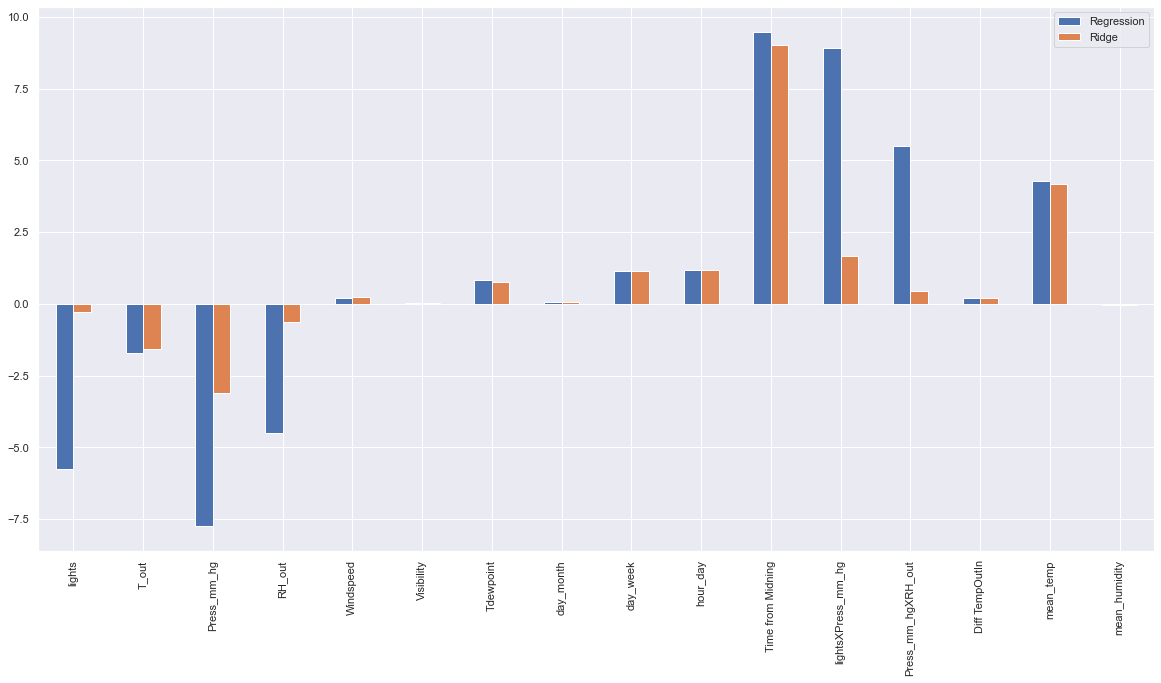

In [62]:
# create a vertical bar chart with bar()
df.plot.bar(figsize = (20,10))

When using Ridge regression, the size of the coefficients is generally smaller compared to the coefficients obtained from simple linear regression. 

The effect of $\lambda$ on the coefficients can be visualized by plotting the magnitude of the coefficients as a function of $\log(\lambda)$. This is known as a regularization path plot. 

In [63]:
from sklearn.linear_model import Ridge
# Define a range of alpha values to test
n_alphas = 100
alphas = np.logspace(0, 10, n_alphas)

# Initialize the Ridge model
ridge = Ridge()

# Declare the data
X_train = TrainDB[InputFeatures]
y_train = TrainDB['Appliances']

# List to store the magnitude of the coefficients for each alpha value
coefs = []

# Loop over each alpha value and fit the model to the training data
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(np.abs(ridge.coef_))  # We append the ABS value of each coefficient

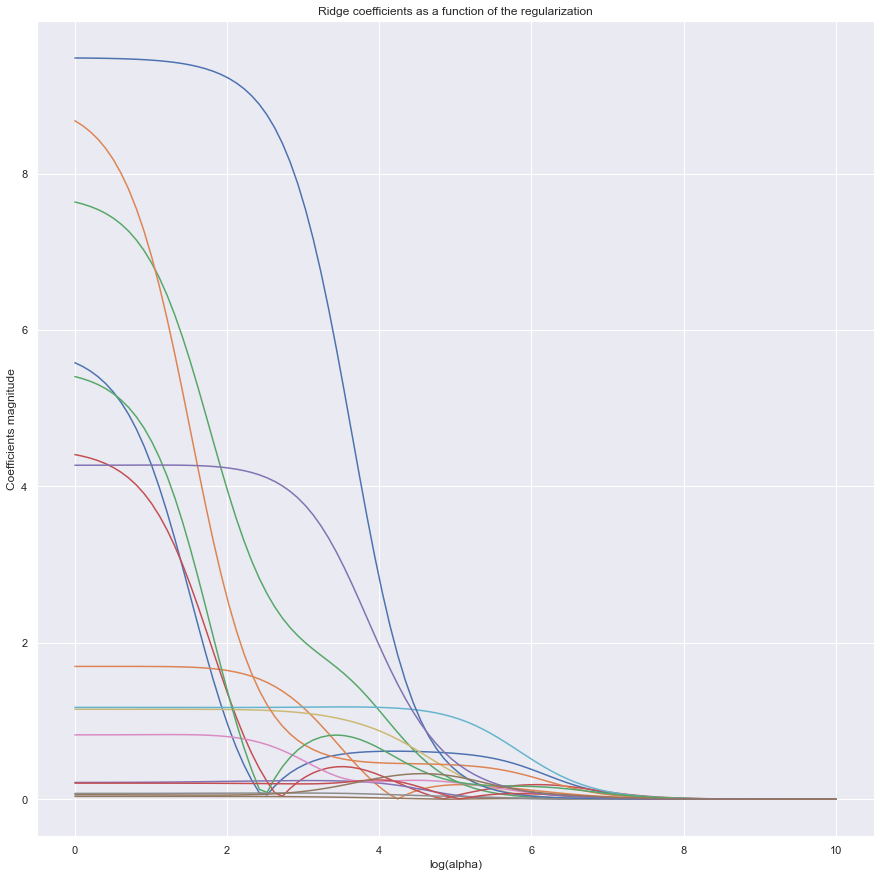

In [64]:
# Plot the magnitude of the coefficients as a function of log(alpha)

plt.figure(figsize=(15,15))

plt.plot(np.log10(alphas), coefs)
plt.xlabel('log(alpha)')
plt.ylabel('Coefficients magnitude')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.show()

Here we see that the degree of shrinkage of the coefficients is controlled by $\lambda$. I've decided to look a little deeper into this plot. I've found the following: 

The regularization path plot can help to identify the optimal value of the regularization parameter for a given model. Typically, as the regularization parameter increases, the coefficients become smaller, and some may eventually become zero, which means that the corresponding feature is effectively removed from the model. The point at which a coefficient becomes zero is called the "elbow" of the regularization path, and it represents a tradeoff between model complexity and performance.

No clear mathematical dynamics can be attributed to this shapes, although one can say that they are rich. We observe some bouncing effects in some trajectories for given $\lambda$ values.

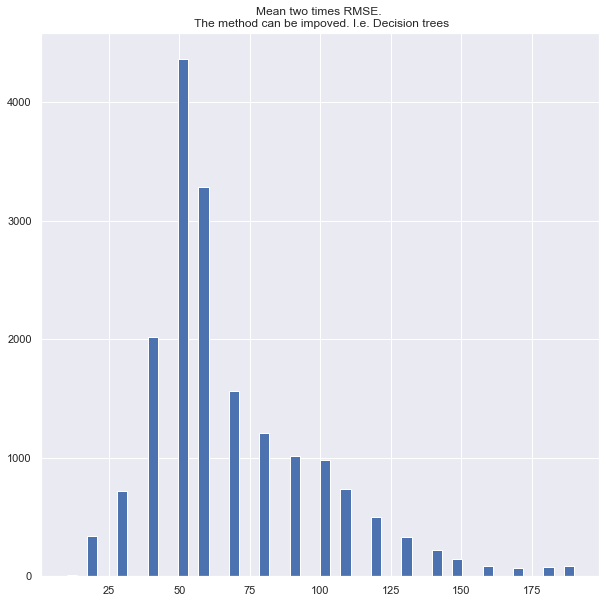

In [65]:

ax = Data['Appliances'].hist(bins = 50)
ax.set_title('Mean two times RMSE. \n The method can be impoved. I.e. Decision trees')
plt.show()